In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [12]:
data = pd.read_csv('compiled_risk_data.csv')
data.head()

,project_name,Smart contract address,Blog post link,Audit website,Chain,Is_closed_source,hidden_owner,anti_whale_modifiable,Is_anti_whale,Is_honeypot,...,centralized_risk_high,centralized_risk_low,event_setter,external_dependencies,immutable_states,reentrancy_without_eth_transfer,incorrect_inheritance_order,shadowing_local,events_maths,Summary/rationale of risk tags marked true
0,Data Analytics,384571416209d08623c6ace9422613fc8970475d,https://chainsecurity.com/security-audit/circl...,https://chainsecurity.com,Ethereum,False,False,False,False,False,...,False,False,True,True,True,True,False,False,False,Bad Contract: Assigned for flaws that indicate...
1,Data Analytics,0xAb5801a7D398351b8bE11C439e05C5B3259ae9B,https://stackoverflow.com/questions/75030483/w...,https://studygroup.moralis.io/t/compilation-er...,Ethereum,False,False,True,True,False,...,False,True,False,True,False,False,True,False,True,Summary/rationale of risk tags marked true: Th...
2,Data Analytics,0x4B20993Bc481177ec7E8f571ceCaE8A9e22C02db,https://stackoverflow.com/questions/71115106/s...,https://ethereum.stackexchange.com/questions/1...,Ethereum,True,False,False,True,False,...,False,True,False,True,False,False,False,True,True,NaN
3,Data Analytics,0x78731D3Ca6b7E34aC0F824c42a7cC18A495cabaB,https://stackoverflow.com/questions/75030483/w...,https://studygroup.moralis.io/t/compilation-er...,Ethereum,True,False,False,False,True,...,False,True,False,False,True,True,False,False,True,NaN
4,Data Analytics,0x617F2E2fD72FD9D5503197092aC168c91465E7f2,https://stackoverflow.com/questions/69466137/h...,https://ethereum.stackexchange.com/questions/1...,Ethereum,True,False,True,False,True,...,False,False,True,True,False,True,False,False,True,The smart contract is marked with risks such a...


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967 entries, 0 to 966
Data columns (total 38 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   project_name                                967 non-null    object
 1   Smart contract address                      967 non-null    object
 2   Blog post link                              967 non-null    object
 3   Audit website                               967 non-null    object
 4   Chain                                       967 non-null    object
 5   Is_closed_source                            967 non-null    bool  
 6   hidden_owner                                967 non-null    bool  
 7   anti_whale_modifiable                       967 non-null    bool  
 8   Is_anti_whale                               967 non-null    bool  
 9   Is_honeypot                                 967 non-null    bool  
 10  buy_tax                   

In [14]:
risk_columns = ['Is_closed_source', 'hidden_owner', 'anti_whale_modifiable',
       'Is_anti_whale', 'Is_honeypot', 'buy_tax', 'sell_tax',
       'slippage_modifiable', 'Is_blacklisted', 'can_take_back_ownership',
       'owner_change_balance', 'is_airdrop_scam', 'selfdestruct', 'trust_list',
       'is_whitelisted', 'is_fake_token', 'illegal_unicode', 'exploitation',
       'bad_contract', 'reusing_state_variable', 'encode_packed_collision',
       'encode_packed_parameters', 'centralized_risk_medium',
       'centralized_risk_high', 'centralized_risk_low', 'event_setter',
       'external_dependencies', 'immutable_states',
       'reentrancy_without_eth_transfer', 'incorrect_inheritance_order',
       'shadowing_local', 'events_maths']

In [15]:
for i in risk_columns:
  if data[i].dtype != bool:
    data[i] = data[i].astype(bool)
print(data[risk_columns].dtypes)

Is_closed_source                   bool
hidden_owner                       bool
anti_whale_modifiable              bool
Is_anti_whale                      bool
Is_honeypot                        bool
buy_tax                            bool
sell_tax                           bool
slippage_modifiable                bool
Is_blacklisted                     bool
can_take_back_ownership            bool
owner_change_balance               bool
is_airdrop_scam                    bool
selfdestruct                       bool
trust_list                         bool
is_whitelisted                     bool
is_fake_token                      bool
illegal_unicode                    bool
exploitation                       bool
bad_contract                       bool
reusing_state_variable             bool
encode_packed_collision            bool
encode_packed_parameters           bool
centralized_risk_medium            bool
centralized_risk_high              bool
centralized_risk_low               bool


In [16]:
percents = []
for i in risk_columns:
  print(i,(" "*(35 - len(i))), "True Percentage", int(data[i].value_counts().loc[True] / len(data) * 100), "%")
  percents.append([i, int(data[i].value_counts().loc[True] / len(data) * 100)])
percents.sort(key = lambda x: x[1], reverse = True)
print("Highest True Value Column :", percents[0])

Is_closed_source                     True Percentage 15 %
hidden_owner                         True Percentage 15 %
anti_whale_modifiable                True Percentage 11 %
Is_anti_whale                        True Percentage 14 %
Is_honeypot                          True Percentage 9 %
buy_tax                              True Percentage 12 %
sell_tax                             True Percentage 12 %
slippage_modifiable                  True Percentage 14 %
Is_blacklisted                       True Percentage 7 %
can_take_back_ownership              True Percentage 18 %
owner_change_balance                 True Percentage 21 %
is_airdrop_scam                      True Percentage 6 %
selfdestruct                         True Percentage 11 %
trust_list                           True Percentage 14 %
is_whitelisted                       True Percentage 10 %
is_fake_token                        True Percentage 8 %
illegal_unicode                      True Percentage 6 %
exploitation       

In [17]:
# Calculating the frequency of 'True' in each risk tag column
true_percents = data[risk_columns].apply(lambda x: x.value_counts() * 100 / len(data)).loc[True]
true_percents = true_percents.fillna(0)  # Replace NaN with 0 for any column that may not have True values

In [19]:
# Calculating the frequency of 'True' in each risk tag column
frequencies = data[risk_columns].apply(lambda x: x.value_counts()).loc[True]
frequencies = frequencies.fillna(0)  # Replace NaN with 0 for any column that may not have True values

In [27]:
def phi_coefficient(x, y):
    """Calculate the Phi coefficient for two binary variables."""
    # Create a contingency table
    contingency_table = pd.crosstab(x, y)
    # Calculate the phi coefficient from the contingency table
    chi2 = scipy.stats.chi2_contingency(contingency_table, correction=False)[0]
    n = np.sum(np.sum(contingency_table, axis = 0))
    phi = np.sqrt(chi2 / n)
    return phi

In [28]:
# Storing phi matrix
risk_df = data[risk_columns]
phi_matrix = pd.DataFrame(index = risk_df.columns, columns = risk_df.columns)

# Calculate Phi coefficient for each pair of binary variables
for var1 in risk_df.columns:
  for var2 in risk_df.columns:
    phi_matrix.loc[var1, var2] = phi_coefficient(risk_df[var1], risk_df[var2])
print("Phi coefficients calculated for all pairs of variables:")
phi_matrix

Phi coefficients calculated for all pairs of variables:


,Is_closed_source,hidden_owner,anti_whale_modifiable,Is_anti_whale,Is_honeypot,buy_tax,sell_tax,slippage_modifiable,Is_blacklisted,can_take_back_ownership,...,centralized_risk_medium,centralized_risk_high,centralized_risk_low,event_setter,external_dependencies,immutable_states,reentrancy_without_eth_transfer,incorrect_inheritance_order,shadowing_local,events_maths
Is_closed_source,1.0,0.369825,0.343793,0.315152,0.395294,0.321812,0.387156,0.395293,0.338371,0.271559,...,0.154038,0.214612,0.220922,0.360043,0.132648,0.275936,0.249433,0.342951,0.369848,0.30473
hidden_owner,0.369825,1.0,0.371578,0.356021,0.328014,0.454177,0.422091,0.418828,0.299462,0.372939,...,0.203848,0.329078,0.205706,0.302669,0.129919,0.228094,0.262604,0.335381,0.299793,0.190843
anti_whale_modifiable,0.343793,0.371578,1.0,0.536006,0.443704,0.460264,0.523498,0.625441,0.33861,0.339978,...,0.230758,0.343159,0.179515,0.374556,0.185268,0.300558,0.309001,0.36614,0.411167,0.303052
Is_anti_whale,0.315152,0.356021,0.536006,1.0,0.371245,0.501367,0.513153,0.507013,0.342278,0.281739,...,0.218796,0.290981,0.198353,0.336262,0.170635,0.383476,0.274457,0.34901,0.385632,0.296332
Is_honeypot,0.395294,0.328014,0.443704,0.371245,1.0,0.386469,0.414324,0.389585,0.478634,0.287442,...,0.191032,0.221966,0.274365,0.367158,0.212279,0.387316,0.31973,0.45656,0.440523,0.358995
buy_tax,0.321812,0.454177,0.460264,0.501367,0.386469,1.0,0.710463,0.444537,0.339422,0.326003,...,0.238537,0.288935,0.218673,0.288925,0.157569,0.359325,0.255471,0.354019,0.38716,0.290881
sell_tax,0.387156,0.422091,0.523498,0.513153,0.414324,0.710463,1.0,0.465644,0.381907,0.272188,...,0.290188,0.307546,0.230666,0.328965,0.179746,0.354068,0.337649,0.328301,0.42844,0.295159
slippage_modifiable,0.395293,0.418828,0.625441,0.507013,0.389585,0.444537,0.465644,1.0,0.285621,0.362606,...,0.236443,0.325821,0.242747,0.384301,0.206749,0.315036,0.346361,0.346984,0.415881,0.327842
Is_blacklisted,0.338371,0.299462,0.33861,0.342278,0.478634,0.339422,0.381907,0.285621,1.0,0.244082,...,0.156619,0.330901,0.176874,0.36036,0.185408,0.29712,0.26178,0.378526,0.432002,0.296575
can_take_back_ownership,0.271559,0.372939,0.339978,0.281739,0.287442,0.326003,0.272188,0.362606,0.244082,1.0,...,0.242296,0.358518,0.215368,0.292306,0.136021,0.303422,0.223104,0.354918,0.311808,0.241693


<ipython-input-30-2fe26f119735>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies.index, y=frequencies.values, palette='viridis')


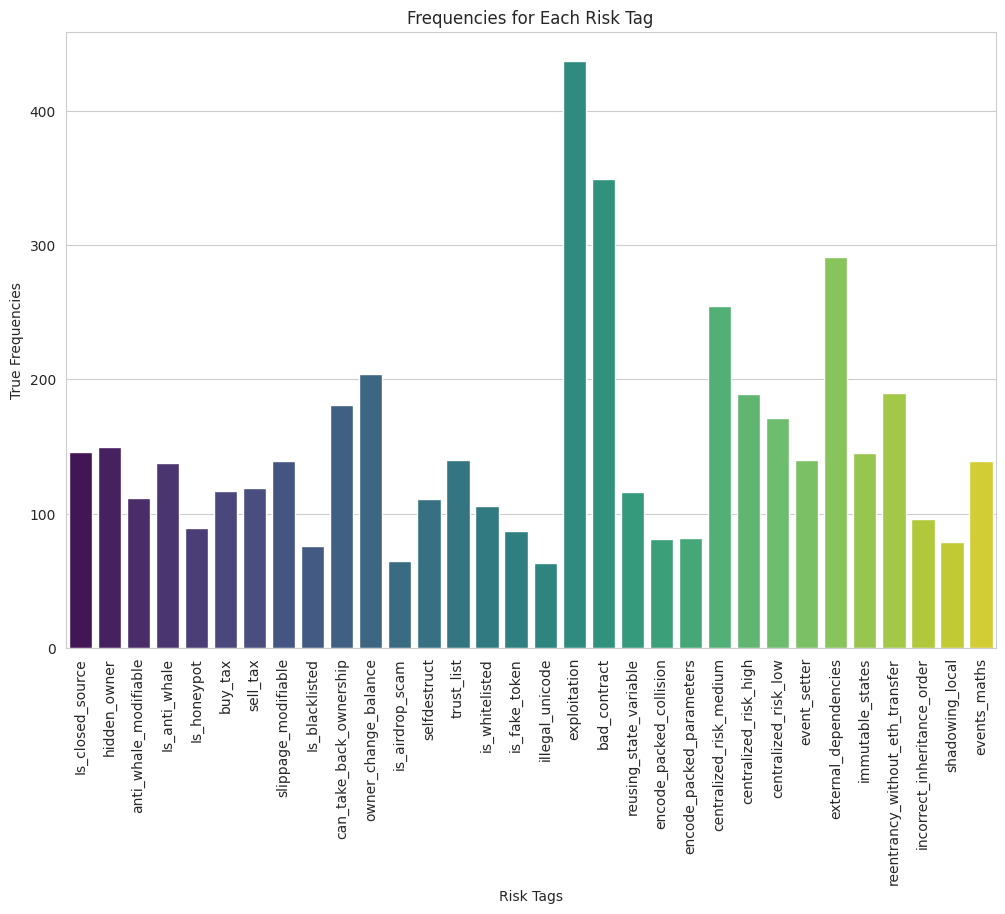

In [30]:
# Visualizing the frequencies using a bar chart
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x=frequencies.index, y=frequencies.values, palette='viridis')
plt.title('Frequencies for Each Risk Tag')
plt.xlabel('Risk Tags')
plt.ylabel('True Frequencies')
plt.xticks(rotation=90)
plt.show()


<ipython-input-18-3641508c1df8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=true_percents.index, y=true_percents.values, palette='viridis')


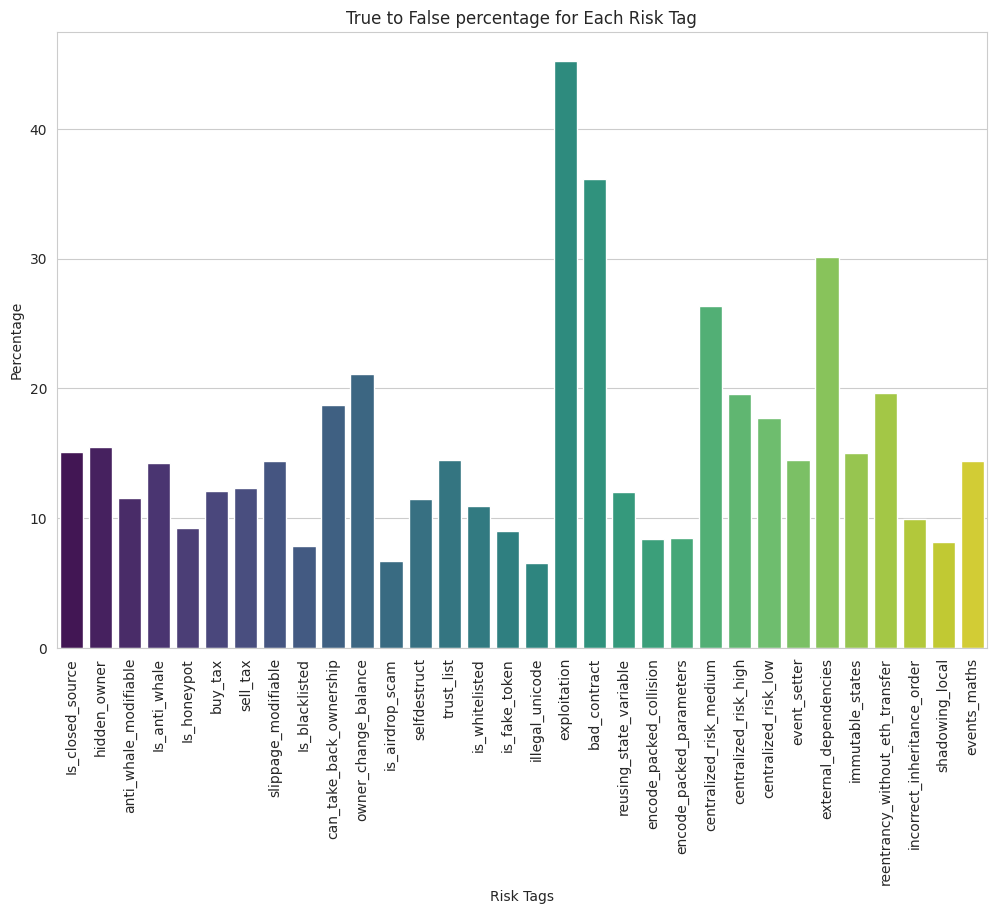

In [18]:
# Visualizing the frequencies using a bar chart
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x=true_percents.index, y=true_percents.values, palette='viridis')
plt.title('True to False percentage for Each Risk Tag')
plt.xlabel('Risk Tags')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.show()


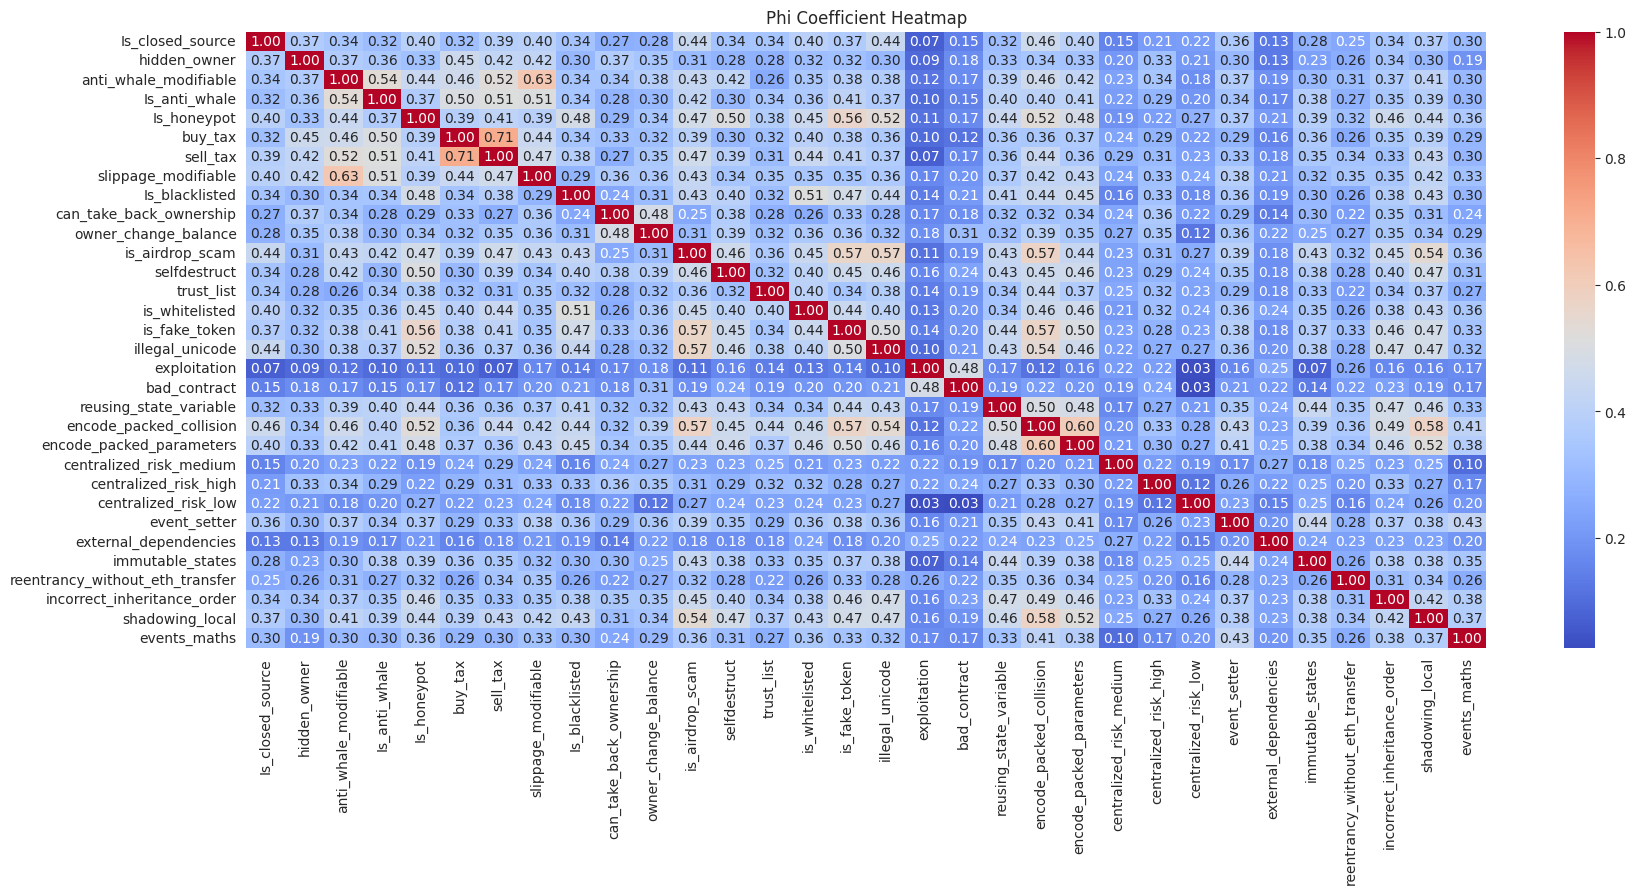

In [29]:
plt.figure(figsize=(20, 8))
sns.heatmap(phi_matrix.astype(float), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Phi Coefficient Heatmap')
plt.show()

In [31]:
# Example calculation between two risk tags
phi = phi_coefficient(data['hidden_owner'], data['is_airdrop_scam'])
print(f"Phi Coefficient between 'hidden_owner' and 'is_airdrop_scam': {phi}")

Phi Coefficient between 'hidden_owner' and 'is_airdrop_scam': 0.3070724672986693
